# QF 600 Asset Pricing | YU Lingfeng
## `Homework 6` 
#### Behavioural Finance | State Price

### <font color = green> Activation of necessary libraries. </font>

In [2]:
# !pip install matplotlib
# !pip install --upgrade openpyxl
# !pip install nbconvert

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import brentq
from IPython.display import display
from IPython.display import Image
import random
import warnings
# Ignore all warnings (not recommended for production code)
warnings.filterwarnings("ignore")

In [4]:
num_samples = int(1e4)
Delta = 0.99
Gamma = 1
Lambda = 2
Mu = 0.02
Sigma = 0.02
# Rf = np.exp(Gamma * Mu - 0.5 * Gamma**2 * Sigma**2 / Delta)
Rf = np.exp(0.0198) / 0.99
Rf

1.0303003233953707

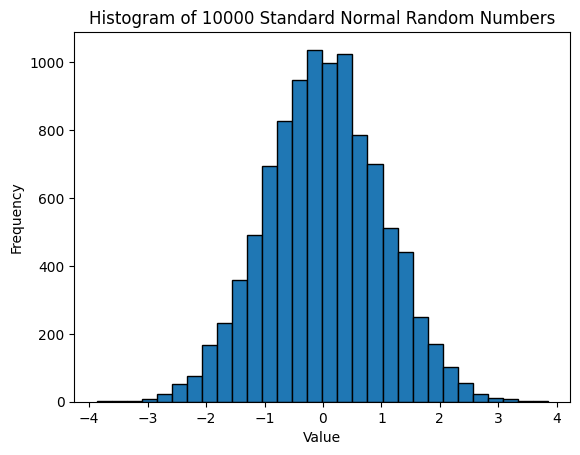

In [5]:
Epsilon = pd.Series(np.random.normal(0, 1, num_samples))
# Create a histogram
plt.hist(Epsilon, bins = 30, edgecolor='k')  
# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Histogram of {num_samples} Standard Normal Random Numbers')
plt.savefig(f'Standard Normal of {num_samples} draws.png')
# Display the histogram
plt.show()

In [6]:
def ln_g(eps):
    return 0.02 + 0.02 * eps
def v_R(R,Rf):
    if R >= Rf:
        return R-Rf
    else:
        return 2 * (R-Rf)

def e(x, b, delta, Rf, eps):
    E_v = eps.apply(lambda val: v_R(x * np.exp(ln_g(val)), Rf)).mean()
    e_x =\
        delta * b * E_v +\
        delta * x - 1
    return e_x

In [16]:
def equity_premium(b, delta, rf, eps, mu, sigma):
    x0 = []
    for b0 in b:
        x0 +=\
            [brentq(lambda x: e(x, b0, delta, rf, eps),
                    1, 1.1, xtol=1e-5)]

    result = pd.DataFrame({'x0': x0,
                      'b0': b})
    result['equity premium'] =\
        result['x0'].apply(lambda x: x * np.exp(mu + 0.5 * sigma**2) - rf)
    result['price dividend ratio'] =\
        result['x0'].apply(lambda x: 1 / (x - 1))
    result.set_index('b0', inplace = True)
    
    plt.figure(figsize=(8, 6))
    plt.plot(result.index, result['price dividend ratio'])
    plt.xlabel('Scale factor b0') 
    plt.ylabel('price dividend ratio') 
    plt.title(f'price dividend ratio Vs scale\
 factor b0 simulated by {len(eps):.1e} samples')
    
    plt.savefig('price dividend ratio.png')
    plt.show()    
    
    plt.figure(figsize=(8, 6))    
    plt.plot(result.index, result['equity premium'])
    plt.xlabel('Scale factor b0') 
    plt.ylabel('equity premium') 
    plt.title(f'Equity Premium Vs scale\
 factor b0 simulated by {len(eps):.1e} samples')
    
    plt.savefig('equity premium.png')
    
    plt.show()    

    return result

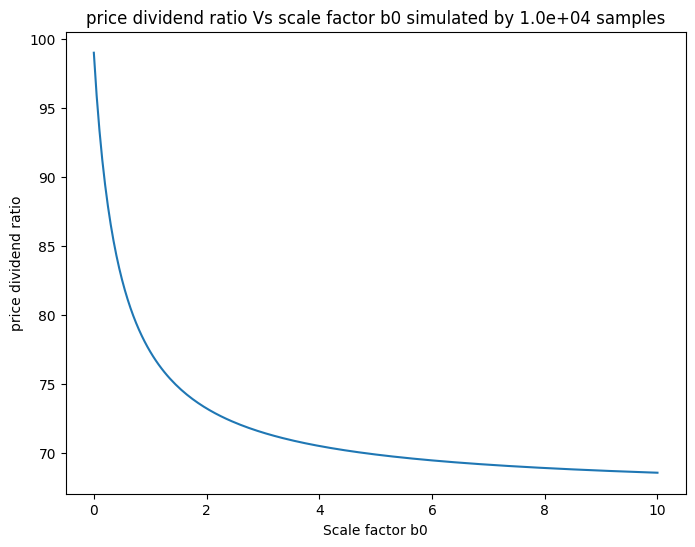

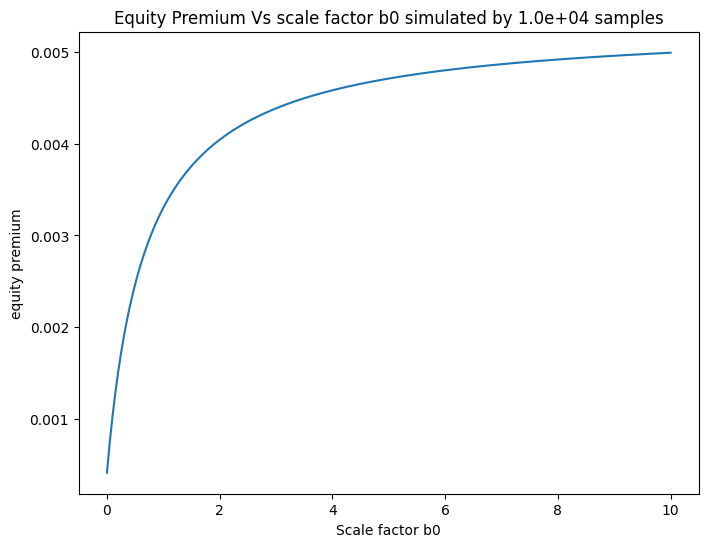

In [37]:
b0 = np.arange(0, 10.05, 0.05)
Behavioural = equity_premium(b0, Delta, Rf, Epsilon, Mu, Sigma)

In [38]:
Behavioural

,x0,equity premium,price dividend ratio
b0,,,
0.00,1.010101,0.000412,99.000000
0.05,1.010429,0.000747,95.885442
0.10,1.010711,0.001035,93.358872
0.15,1.010962,0.001291,91.225871
0.20,1.011183,0.001516,89.423511
...,...,...,...
9.80,1.014583,0.004986,68.572479
9.85,1.014585,0.004987,68.565332
9.90,1.014586,0.004989,68.558253


> ### Question 1: Behavioural Finance Plot

#### Q1.1 ε draws distribution

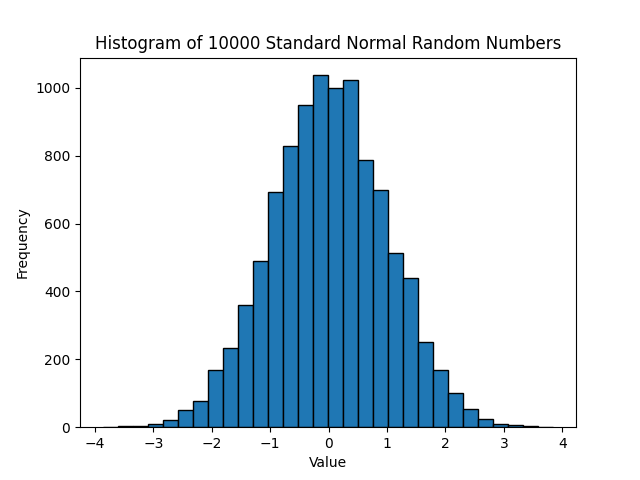

In [19]:
Image("Standard Normal of 10000 draws.png")

#### Q1.2 calculation results on range of b0 values

In [39]:
Behavioural

,x0,equity premium,price dividend ratio
b0,,,
0.00,1.010101,0.000412,99.000000
0.05,1.010429,0.000747,95.885442
0.10,1.010711,0.001035,93.358872
0.15,1.010962,0.001291,91.225871
0.20,1.011183,0.001516,89.423511
...,...,...,...
9.80,1.014583,0.004986,68.572479
9.85,1.014585,0.004987,68.565332
9.90,1.014586,0.004989,68.558253


#### Q1.3 Plot price-dividend ratio vs b0

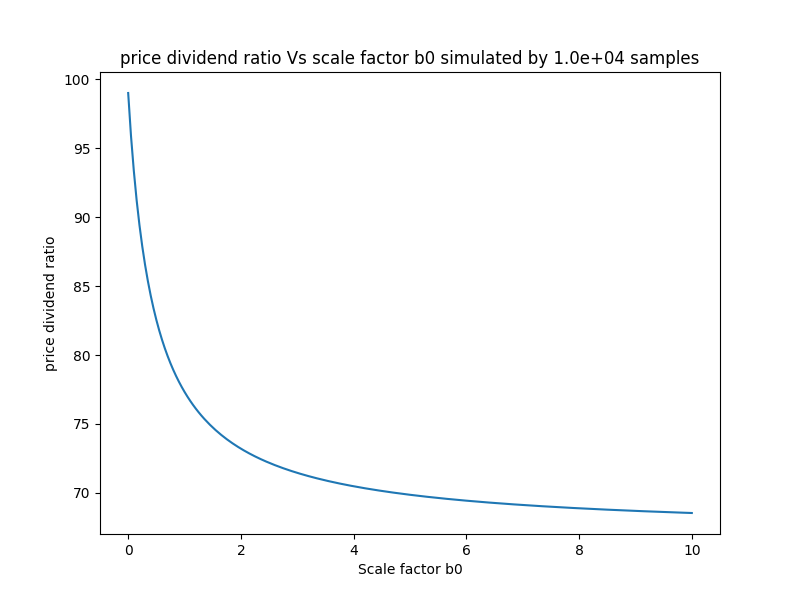

In [21]:
Image("price dividend ratio.png")

#### Q1.4 Plot price-dividend ratio vs b0

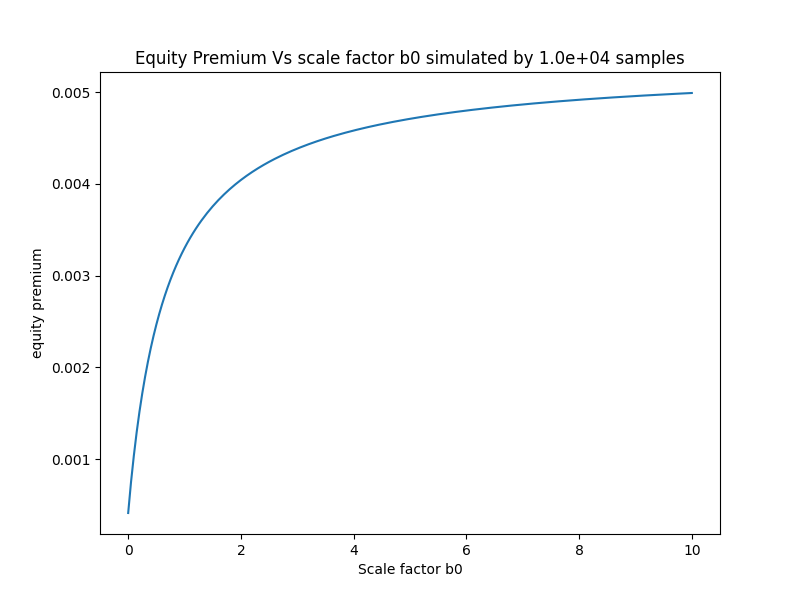

In [22]:
Image("equity premium.png")

> ### Question 2: State Prices (exercise example)

In [23]:
# 3 state assumed: Good, Normal, Bad
rf = 1.1
p0 = [45, 45]
ra = [75, 55, 20]
rb = [60, 50, 40]
p = [0.3, 0.5, 0.2]

In [24]:
r = np.array([ra, rb])

In [25]:
r = r.T

In [26]:
# Create a column of ones
unit_vector = np.ones((r.shape[0], 1))

# Stack the unit vector and the original matrix horizontally
new_matrix = np.hstack((unit_vector, r))

In [27]:
new_matrix

array([[ 1., 75., 60.],
       [ 1., 55., 50.],
       [ 1., 20., 40.]])

In [28]:
def State_Prices(Rf, p_start, R_matrix, call_price):
    x = np.array([1/Rf] + p_start)
    R_matrix = np.array(R_matrix).T
    call_payoff_vector =\
        np.clip(R_matrix.sum(axis = 1)-100,
                a_min=0, a_max=None)
    # Create a column of ones
    e = np.ones((R_matrix.shape[0], 1))
    # Stack the unit vector and the original matrix horizontally
    R_matrix = np.hstack((e, R_matrix))
    Vector_state_prices = x @ np.linalg.inv(
        R_matrix)
    pi_risk_neutral = Vector_state_prices * Rf
    call_price = Vector_state_prices.T @ call_payoff_vector
    return call_price

In [29]:
x = State_Prices(rf, p0, np.array([ra, rb]), 100)

In [30]:
x

10.000000000000027

## QF 600 Asset Pricing | `Homework 6` | YU Lingfeng
## Behavioural Finance | Submission 2

> ### Question 1: Behavioural Finance Plot

#### Q1.1 ε draws distribution

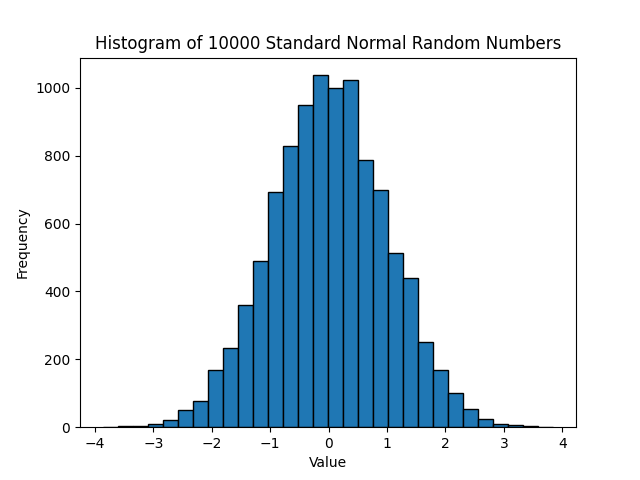

In [35]:
Image("Standard Normal of 10000 draws.png")

#### Q1.2 calculation results on range of b0 values

In [40]:
Behavioural

,x0,equity premium,price dividend ratio
b0,,,
0.00,1.010101,0.000412,99.000000
0.05,1.010429,0.000747,95.885442
0.10,1.010711,0.001035,93.358872
0.15,1.010962,0.001291,91.225871
0.20,1.011183,0.001516,89.423511
...,...,...,...
9.80,1.014583,0.004986,68.572479
9.85,1.014585,0.004987,68.565332
9.90,1.014586,0.004989,68.558253


#### Q1.3 Plot price-dividend ratio vs b0

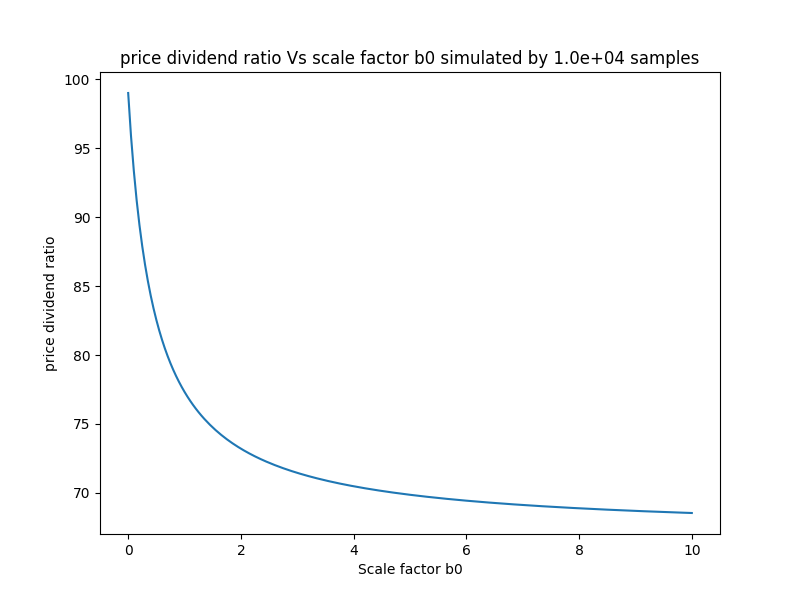

In [33]:
Image("price dividend ratio.png")

#### Q1.4 Plot price-dividend ratio vs b0

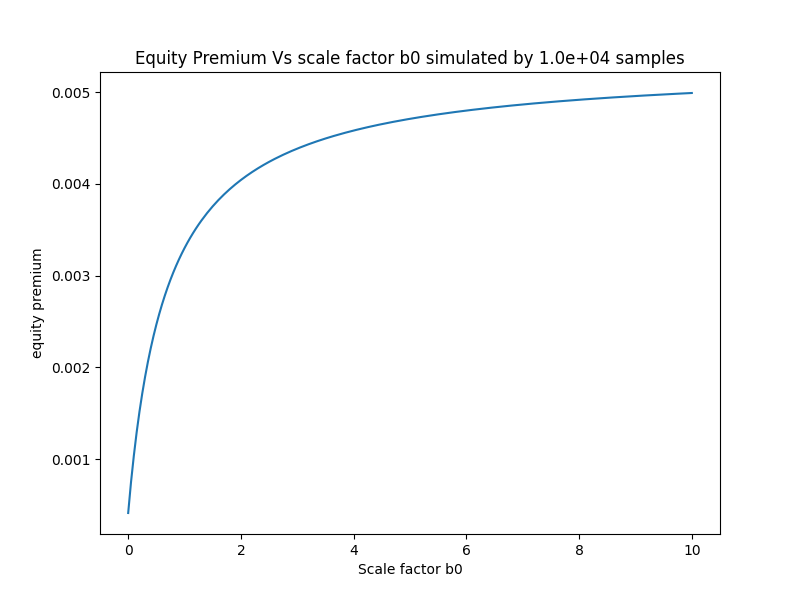

In [34]:
Image("equity premium.png")

#### Q1.5 Briefly explain main characteristics of v(∙) (which is utility function to measure utility from recent financial gain or loss), as well as economic significance of b0 and λ.


#### Ans:

#### 1. v(∙)  if Xt represents recent financial gain or loss, the v(Xt) measures utility from recent financial gain or loss. Gain or loss is measured relative to reference level, which is usually Risk-Free rate of return. the utility function basically captures LOSS AVERSION in addition to the risk aversion part. Thus the v(Xt) ploted against Xt axis would have larger slope coefficient value on negative part of Xt axis, while the positive Xt axis the slope coefficient value is 1.
#### 2. λ basically indicates how sensitive when investor is to face outright financial loss. Based on a more realistic model, λ is larger than 1, as investors are more loss aversion than risk aversion. Usually, we assume λ = 2. 
#### 3. b0 indicates the scale factor for marginal utility of aggregate consumption. b0 > 0 can be assumed, as investor’s lifetime gain would increase utility, and vice versa. b0 measures the extent to which utility from recent financial gain or loss contributes to investor’s lifetime utility. With this scale factor, the recent loss or gain would have an accumulating effects on investor's lifetime utility.